# Import Libraries

In [39]:
import os
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from scipy.interpolate import griddata

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [28]:
curr_dir = (os.getcwd()).replace('\\', '/')
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

## Stream Sediment Data

In [4]:
str_sed_data = pd.read_csv(data_path + '/stream_sediments_57F11.csv')

In [3]:
str_sed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gid        203 non-null    int64  
 1   objectid   203 non-null    int64  
 2   sampleno   203 non-null    object 
 3   longitude  203 non-null    float64
 4   latitude   203 non-null    float64
 5   sio2       203 non-null    float64
 6   al2o3      203 non-null    float64
 7   fe2o3      203 non-null    float64
 8   tio2       203 non-null    float64
 9   cao        203 non-null    float64
 10  mgo        203 non-null    float64
 11  mno        203 non-null    float64
 12  na2o       203 non-null    float64
 13  k2o        203 non-null    float64
 14  p2o5       203 non-null    float64
 15  loi        203 non-null    float64
 16  ba         203 non-null    float64
 17  ga         203 non-null    float64
 18  sc         203 non-null    float64
 19  v          203 non-null    float64
 20  th        

In [4]:
str_sed_data.describe()

,gid,objectid,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,mgo,...,w,u,pt,pd,in_,f,te,tl,hg,cd
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.0,203.000000,203.0,203.0,203.0,203.0,203.0,203.0,203.000000,203.000000
mean,3886.817734,3886.817734,77.625159,14.374757,61.577385,15.343576,5.106995,0.072808,1.711232,3.511527,...,2.5,2.898556,0.0,0.0,0.0,0.0,0.0,0.0,8.507389,51.556650
std,392.690039,392.690039,0.077262,0.073240,4.585337,1.115737,1.852035,0.037739,0.781060,1.287493,...,0.0,1.197724,0.0,0.0,0.0,0.0,0.0,0.0,9.023413,9.966801
min,2947.000000,2947.000000,77.500000,14.259009,44.100000,12.090000,2.460000,0.030000,0.580000,1.270000,...,2.5,0.507633,0.0,0.0,0.0,0.0,0.0,0.0,2.500000,50.000000
25%,3705.500000,3705.500000,77.564815,14.313063,59.146000,14.625000,3.975000,0.050000,1.200000,2.630000,...,2.5,2.125364,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,50.000000
50%,3934.000000,3934.000000,77.620370,14.367117,62.750000,15.360000,4.650000,0.060000,1.520000,3.210000,...,2.5,2.646843,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,50.000000
75%,4160.500000,4160.500000,77.694444,14.439189,64.325000,16.120000,5.525000,0.070000,1.965000,4.040000,...,2.5,3.588826,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,50.000000
max,5073.000000,5073.000000,77.749999,14.493242,69.860000,17.970000,12.250000,0.230000,5.720000,8.380000,...,2.5,7.094000,0.0,0.0,0.0,0.0,0.0,0.0,80.000000,128.000000


Max and Min:
- Longitude
- Latitude

In [78]:
sed_max_long = max(str_sed_data['longitude'])
sed_min_long = min(str_sed_data['longitude'])

sed_max_lat = max(str_sed_data['latitude'])
sed_min_lat = min(str_sed_data['latitude'])

print("Stream Sediment coordinates - ")

print(f"Maximum longitude co-ordinate: {sed_max_long}")
print(f"Minimum longitude co-ordinate: {sed_min_long}")

print(f"Maximum latitude co-ordinate: {sed_max_lat}")
print(f"Minimum latitude co-ordinate: {sed_min_lat}")

Stream Sediment coordinates - 
Maximum longitude co-ordinate: 77.749999
Minimum longitude co-ordinate: 77.5
Maximum latitude co-ordinate: 14.493242
Minimum latitude co-ordinate: 14.259009


In [6]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,u,pt,pd,toposheet,in_,f,te,tl,hg,cd
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,3.016905,0,0,57F11,0,0,0,0,8.0,50
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,3.378550,0,0,57F11,0,0,0,0,9.0,50
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,3.509000,0,0,57F11,0,0,0,0,2.5,50
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,4.241000,0,0,57F11,0,0,0,0,19.0,50
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,4.218000,0,0,57F11,0,0,0,0,19.0,50


In [7]:
str_sed_data['toposheet'].value_counts()

toposheet
57F11    196
57F07      7
Name: count, dtype: int64

### Elements composition from different samples

In [8]:
elements = []

for col in list(str_sed_data.columns):
    if col not in ['gid', 'objectid', 'sampleno', 'longitude', 'latitude', 'toposheet']:
        elements.append(col)

In [9]:
elements_df = str_sed_data[elements]
elements_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,w,u,pt,pd,in_,f,te,tl,hg,cd
0,61.921,14.606,4.51,0.05,2.28,3.24,1.52,2.46,0.61,0.13,...,2.5,3.016905,0,0,0,0,0,0,8.0,50
1,62.077,13.750,4.22,0.05,2.43,4.14,1.52,2.55,0.64,0.12,...,2.5,3.378550,0,0,0,0,0,0,9.0,50
2,68.645,13.410,3.02,0.05,1.32,3.19,2.89,3.08,0.75,0.08,...,2.5,3.509000,0,0,0,0,0,0,2.5,50
3,64.950,14.280,3.46,0.05,1.75,3.10,2.34,2.82,0.60,0.12,...,2.5,4.241000,0,0,0,0,0,0,19.0,50
4,64.302,14.010,4.08,0.05,1.84,3.24,2.12,2.83,0.75,0.16,...,2.5,4.218000,0,0,0,0,0,0,19.0,50


In [10]:
elem_rem = []
for col in elements:
    if (elements_df[col] == 0).all():
        elem_rem.append(col)
print(f"Elements which don't contribute in the sediment composition: {elem_rem}")

Elements which don't contribute in the sediment composition: ['pt', 'pd', 'in_', 'f', 'te', 'tl']


In [11]:
elements_df.drop(elem_rem, axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4872\3601930424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_df.drop(elem_rem, axis=1, inplace=True)


In [ ]:
sns.set(rc = {'figure.figsize':(12,12)})
ax = sns.heatmap(elements_df.corr(), 
                 cmap='YlGnBu', 
                 annot=True)
ax.set_title('Co-relation heatmap', 
             fontsize=18)

## Gravity Data

In [73]:
gravity_data = pd.read_csv(data_path + '/gravity_57F11.csv')

In [74]:
gravity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         363 non-null    int64  
 1   objectid    363 non-null    int64  
 2   longitude_  363 non-null    float64
 3   latitude_r  363 non-null    float64
 4   elevation_  363 non-null    int64  
 5   observed_g  363 non-null    int64  
 6   theoretica  363 non-null    int64  
 7   bouguer_an  363 non-null    int64  
 8   toposheet   363 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 25.6+ KB


In [75]:
gravity_data.head()

,gid,objectid,longitude_,latitude_r,elevation_,observed_g,theoretica,bouguer_an,toposheet
0,386966,386966,77.6264,14.2569,443,978167,978345,-91,57F/11
1,386967,386967,77.6278,14.2653,438,978168,978346,-91,57F/11
2,386968,386968,77.6281,14.2750,434,978170,978346,-90,57F/11
3,386969,386969,77.6292,14.2839,429,978170,978347,-91,57F/11
4,386970,386970,77.6286,14.2931,421,978173,978347,-90,57F/11


In [104]:
grav_max_long = max(gravity_data['longitude_'])
grav_min_long = min(gravity_data['longitude_'])

grav_max_lat = max(gravity_data['latitude_r'])
grav_min_lat = min(gravity_data['latitude_r'])

print("Gravity coordinates - ")

print(f"Maximum longitude co-ordinate: {grav_max_long}")
print(f"Minimum longitude co-ordinate: {grav_min_long}")

print(f"Maximum latitude co-ordinate: {grav_max_lat}")
print(f"Minimum latitude co-ordinate: {grav_min_lat}")

Gravity coordinates - 
Maximum longitude co-ordinate: 77.7489
Minimum longitude co-ordinate: 77.5006
Maximum latitude co-ordinate: 14.5
Minimum latitude co-ordinate: 14.2514


## Magnetic Data

In [29]:
magnetic_data = pd.read_csv(data_path + '/magnetic_57F11.csv')

In [30]:
magnetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         337 non-null    int64  
 1   objectid    337 non-null    int64  
 2   observed_m  337 non-null    float64
 3   igrf_nt     337 non-null    float64
 4   magnetic_a  337 non-null    float64
 5   longitude_  337 non-null    float64
 6   latitude_r  337 non-null    float64
 7   toposheet   337 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 21.2+ KB


In [102]:
magnetic_data.head()

,gid,objectid,observed_m,igrf_nt,magnetic_a,longitude_,latitude_r,toposheet
0,317368,317368,40872.13132,41573.71077,-701.579447,77.66925,14.30908,57F/11
1,317369,317369,41135.13264,41629.78027,-494.647631,77.65450,14.49714,57F/11
2,317370,317370,41152.13245,41621.69501,-469.562560,77.66114,14.46881,57F/11
3,317371,317371,41165.13195,41604.09323,-438.961281,77.54458,14.44861,57F/11
4,317372,317372,41203.13215,41609.26900,-406.136845,77.65169,14.43136,57F/11


In [105]:
mag_max_long = max(magnetic_data['longitude_'])
mag_min_long = min(magnetic_data['longitude_'])

mag_max_lat = max(magnetic_data['latitude_r'])
mag_min_lat = min(magnetic_data['latitude_r'])

print("Magnetic coordinates - ")

print(f"Maximum longitude co-ordinate: {mag_max_long}")
print(f"Minimum longitude co-ordinate: {mag_min_long}")

print(f"Maximum latitude co-ordinate: {mag_max_lat}")
print(f"Minimum latitude co-ordinate: {mag_min_lat}")

Magnetic coordinates - 
Maximum longitude co-ordinate: 77.74933
Minimum longitude co-ordinate: 77.50089
Maximum latitude co-ordinate: 14.49911
Minimum latitude co-ordinate: 14.25006


## Interpolation of Gravity and Magnetic anomalies at Sediment locations

In [106]:
grav_lat = gravity_data['latitude_r']
grav_long = gravity_data['longitude_']
grav_elevation = gravity_data['elevation_']
grav_bg_an = gravity_data['bouguer_an']

mag_lat = magnetic_data['latitude_r']
mag_long = magnetic_data['longitude_']
mag_an = magnetic_data['magnetic_a']

sed_lat = str_sed_data['latitude']
sed_long = str_sed_data['longitude']
sed_composition = elements_df

In [107]:
elevation_interpolated = griddata((grav_lat, grav_long), grav_elevation, (sed_lat, sed_long), method='linear')
bouger_anomaly_interpolated = griddata((grav_lat, grav_long), grav_bg_an, (sed_lat, sed_long), method='linear')
magnetic_anomaly_interpolated = griddata((mag_lat, mag_long), mag_an, (sed_lat, sed_long), method='linear')

In [109]:
str_sed_data['interpolated_elevation'] = elevation_interpolated
str_sed_data['interpolated_bouger_anomaly'] = bouger_anomaly_interpolated
str_sed_data['interpolated_magnetic_anomaly'] = magnetic_anomaly_interpolated

str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,toposheet,in_,f,te,tl,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,57F11,0,0,0,0,8.0,50,374.881622,-89.056606,60.049774
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,57F11,0,0,0,0,9.0,50,369.412956,-89.795136,267.924225
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,57F11,0,0,0,0,2.5,50,360.583097,-90.236797,3.797230
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,57F11,0,0,0,0,19.0,50,355.814941,-90.000000,96.035242
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,57F11,0,0,0,0,19.0,50,351.721784,-90.671204,192.970610


## Chemical Data

In [32]:
chemical_data = pd.read_csv(data_path + '/gcm_CR_57f11.csv')

In [33]:
chemical_data.head()

,gid,objectid_1,ssampleno,type,longitude,latitude,SiO2,Al2O3,Fe2O3,TiO2,...,Pt,Pd,Soi_No.,F,In,Te,Tl,Cd,Hg,View on Map
0,2277,247676,57F11/A1/R/12,Regolith,77.5417,14.4583,46.35,21.43,12.24,1.15,...,0,0,57F11,0,0,0,0,NaN,NaN,NaN
1,2278,247677,57F11/A2/R/12,Regolith,77.5417,14.3750,43.29,24.93,15.26,1.06,...,0,0,57F11,0,0,0,0,NaN,NaN,NaN
2,2279,247678,57F11/A3/R/12,Regolith,77.5417,14.2917,57.83,17.57,5.42,0.79,...,0,0,57F11,0,0,0,0,NaN,NaN,NaN
3,2280,247679,57F11/A4/R/12,Regolith,77.6250,14.4583,48.06,20.14,10.82,0.56,...,0,0,57F11,0,0,0,0,NaN,NaN,NaN
4,2281,247680,57F11/A5/R/12,Regolith,77.6250,14.3750,61.78,16.94,5.75,0.71,...,0,0,57F11,0,0,0,0,NaN,NaN,NaN


In [34]:
chem_elem_rem = []
for col in chemical_data.columns:
    if (chemical_data[col] == 0).all() or (chemical_data[col].isna()).all():
        chem_elem_rem.append(col)
        
print(f"Chemical Elements which don't contribute in the composition: {chem_elem_rem}")

Chemical Elements which don't contribute in the composition: ['LOI', 'Au', 'Li', 'Cs', 'As', 'Sb', 'Bi', 'Se', 'Ag', 'Mo', 'Sn', 'w', 'Pt', 'Pd', 'F', 'In', 'Te', 'Tl', 'Cd', 'Hg', 'View on Map']


In [35]:
chemical_data.drop(chem_elem_rem, axis=1, inplace=True)

In [36]:
chem_elem = []
for col in chemical_data.columns:
    if col not in ['gid', 'objectid_1', 'ssampleno', 'type', 'longitude', 'latitude', 'Soi_No.']:
        chem_elem.append(col)

print(f"Chemical elements: {chem_elem}")

Chemical elements: ['SiO2', 'Al2O3', 'Fe2O3', 'TiO2', 'CaO', 'MgO', 'MnO', 'Na2O', 'K2O', 'P2O5', 'Ba', 'Ga', 'Sc', 'V', 'Th', 'Pb', 'Ni', 'Co', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cr', 'Cu', 'Zn', 'Be', 'Ge', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Tb', 'Gd', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'U']


In [26]:
chemical_data.drop(chem_elem_rem, axis=1, inplace=True)

### Normalise the values

In [37]:
common_columns = chemical_data.columns.intersection(['longitude', 'latitude'] + chem_elem)
common_column_indices = [chemical_data.columns.get_loc(col) for col in common_columns]

ct = ColumnTransformer(
    [('sc', 
      StandardScaler(), 
      common_column_indices)],
    remainder='drop'
)

norm_chem_data = ct.fit_transform(chemical_data)

non_scaled_cols = chemical_data.columns.difference(common_columns)

norm_chem_data_scaled = pd.DataFrame(norm_chem_data, 
                                        index=chemical_data.index, 
                                        columns=common_columns)
norm_chem_data = pd.concat([chemical_data[non_scaled_cols], 
                            norm_chem_data_scaled], 
                           axis=1)
norm_chem_data.head()

,Soi_No.,gid,objectid_1,ssampleno,type,longitude,latitude,SiO2,Al2O3,Fe2O3,...,Gd,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,U
0,57F11,2277,247676,57F11/A1/R/12,Regolith,-1.224745,1.224745,-0.826984,0.859677,1.215873,...,-0.531422,-0.087044,0.093138,0.111040,0.483560,0.015476,0.271001,-0.012749,-0.412039,-0.295889
1,57F11,2278,247677,57F11/A2/R/12,Regolith,-1.224745,0.000000,-1.326932,2.134021,2.218830,...,0.138517,0.425080,0.781698,0.799127,0.291558,0.601446,0.568441,-0.608787,-0.353914,-0.534463
2,57F11,2279,247678,57F11/A3/R/12,Regolith,-1.224745,-1.224745,1.048639,-0.545743,-1.049083,...,-1.681694,-2.186245,-2.301851,-2.324567,-2.396468,-2.338008,-2.405958,-1.408968,-1.039784,-1.308217
3,57F11,2280,247679,57F11/A4/R/12,Regolith,0.000000,1.224745,-0.547601,0.389990,0.744284,...,-0.465060,0.034649,0.123076,0.296715,0.099557,0.005870,0.211513,-0.601336,-0.691037,-0.727902
4,57F11,2281,247680,57F11/A5/R/12,Regolith,0.000000,0.000000,1.693997,-0.775125,-0.939488,...,-0.164851,-0.396347,-0.266110,-0.511514,-0.412449,-0.464826,0.033049,1.276184,-0.388789,0.336010


### PCA on Chemical elements

In [38]:
chem_elem_df = norm_chem_data[chem_elem]
chem_elem_df.head()

,SiO2,Al2O3,Fe2O3,TiO2,CaO,MgO,MnO,Na2O,K2O,P2O5,...,Gd,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,U
0,-0.826984,0.859677,1.215873,0.641729,-0.222692,-0.618625,1.042054,-0.717241,-0.871818,-0.594289,...,-0.531422,-0.087044,0.093138,0.111040,0.483560,0.015476,0.271001,-0.012749,-0.412039,-0.295889
1,-1.326932,2.134021,2.218830,0.342132,-0.558731,-0.529384,1.647117,-1.501424,-1.183925,-0.794236,...,0.138517,0.425080,0.781698,0.799127,0.291558,0.601446,0.568441,-0.608787,-0.353914,-0.534463
2,1.048639,-0.545743,-1.049083,-0.556659,-0.506725,-0.360819,-0.571449,0.277333,1.250508,-0.494315,...,-1.681694,-2.186245,-2.301851,-2.324567,-2.396468,-2.338008,-2.405958,-1.408968,-1.039784,-1.308217
3,-0.547601,0.389990,0.744284,-1.322295,0.525394,0.065553,1.042054,1.004137,-0.834365,0.405449,...,-0.465060,0.034649,0.123076,0.296715,0.099557,0.005870,0.211513,-0.601336,-0.691037,-0.727902
4,1.693997,-0.775125,-0.939488,-0.822967,-0.238694,-0.846684,-0.974824,1.711815,1.013307,-0.594289,...,-0.164851,-0.396347,-0.266110,-0.511514,-0.412449,-0.464826,0.033049,1.276184,-0.388789,0.336010


In [54]:
pca = PCA(n_components=10)
pca.fit(chem_elem_df)

PCA(n_components=10)

In [50]:
total_variance = sum(pca.explained_variance_)
desired_variance = 0.85
cumulative_variance = 0
num_comp = 0

for explained_variance_ in pca.explained_variance_:
    cumulative_variance += explained_variance_
    if cumulative_variance / total_variance >= desired_variance:
        break
    num_comp += 1

print(f"Number of components to explain atleast {desired_variance*100}% of variance: {num_comp}")

Number of components to explain atleast 85.0% of variance: 4


In [55]:
pca.explained_variance_ratio_

array([0.35335841, 0.26597378, 0.13821764, 0.05340244, 0.04430335,
       0.03789187, 0.02771916, 0.02266327, 0.01692225, 0.01418154])

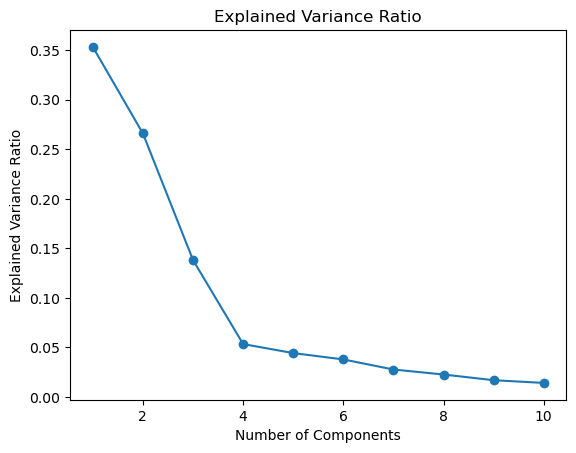

In [56]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

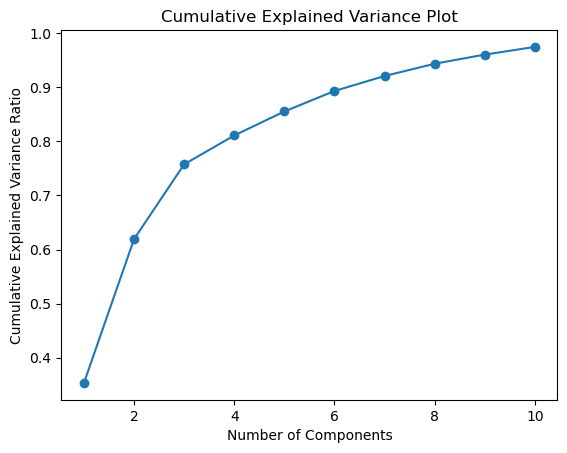

In [58]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()

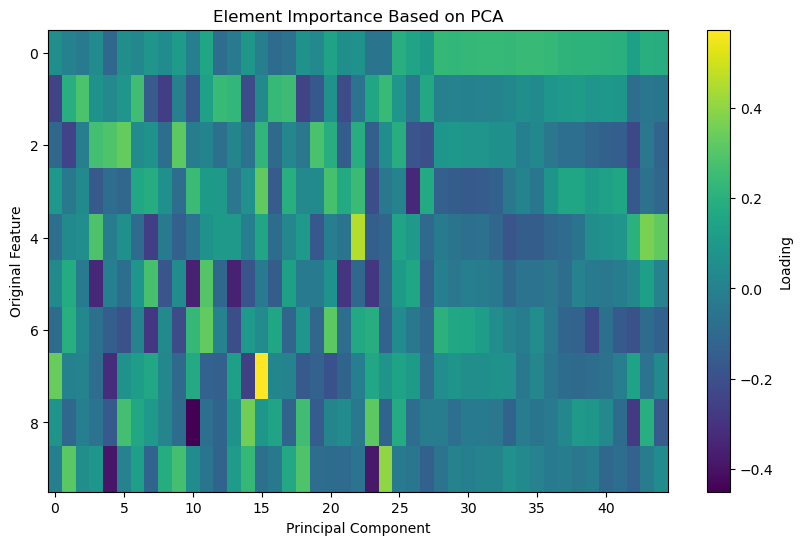

In [61]:
loadings = pca.components_

plt.figure(figsize=(10, 6))
plt.imshow(loadings, 
           cmap='viridis', 
           aspect='auto')
plt.colorbar(label='Loading')
plt.xlabel('Principal Component')
plt.ylabel('Original Feature')
plt.title('Element Imp
ortance Based on PCA')
plt.show()

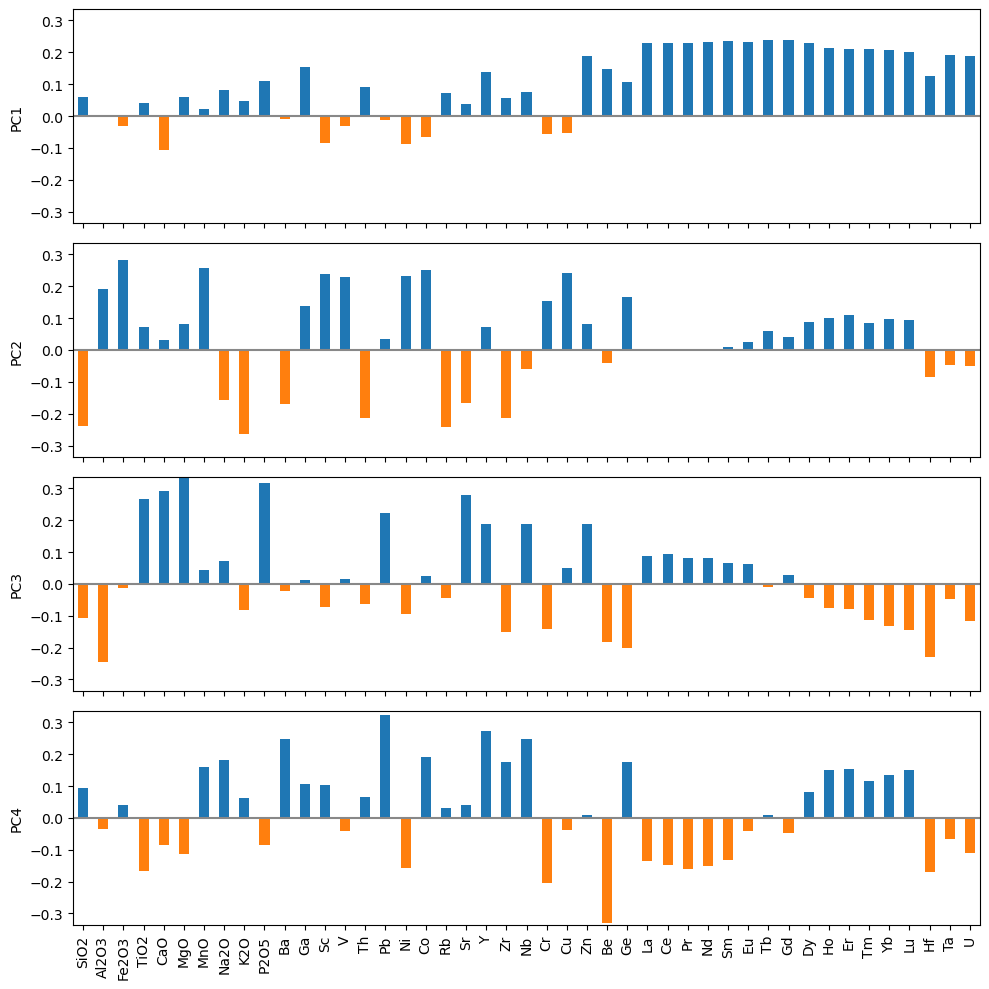

In [98]:
num_com_to_plot = 4
loadings_to_plot = loadings[:num_com_to_plot]
loadings_df = pd.DataFrame(loadings_to_plot, 
                           columns=chem_elem)

# Calculate the maximum absolute value for setting y-axis limits
max_pc = 1.01 * np.max(np.abs(loadings_to_plot))

# Plot loadings for each principal component
fig, axes = plt.subplots(num_com_to_plot, 
                         1, 
                         figsize=(10, 10), 
                         sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings_df.iloc[i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-max_pc, max_pc)

plt.tight_layout()
plt.show()

# KMeans Clustering

## Finding the right K

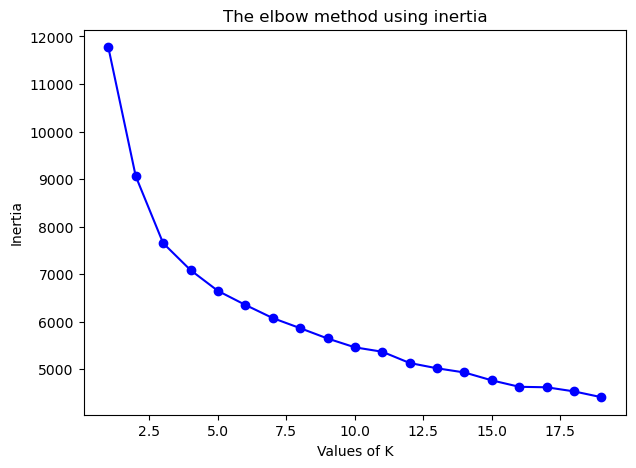

In [67]:
inertia = []                                     ## Sum-of-squared distances
for k in range(1, 20):
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300, 
        tol=1e-03, random_state=0
    )
    km.fit_predict(norm_str_sed_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 20), inertia, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

In [62]:
loc_df = norm_str_sed_data[['longitude', 'latitude']].values
loc_df = norm_str_sed_data.values

In [68]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-03, random_state=0
)
y_km = km.fit_predict(loc_df)

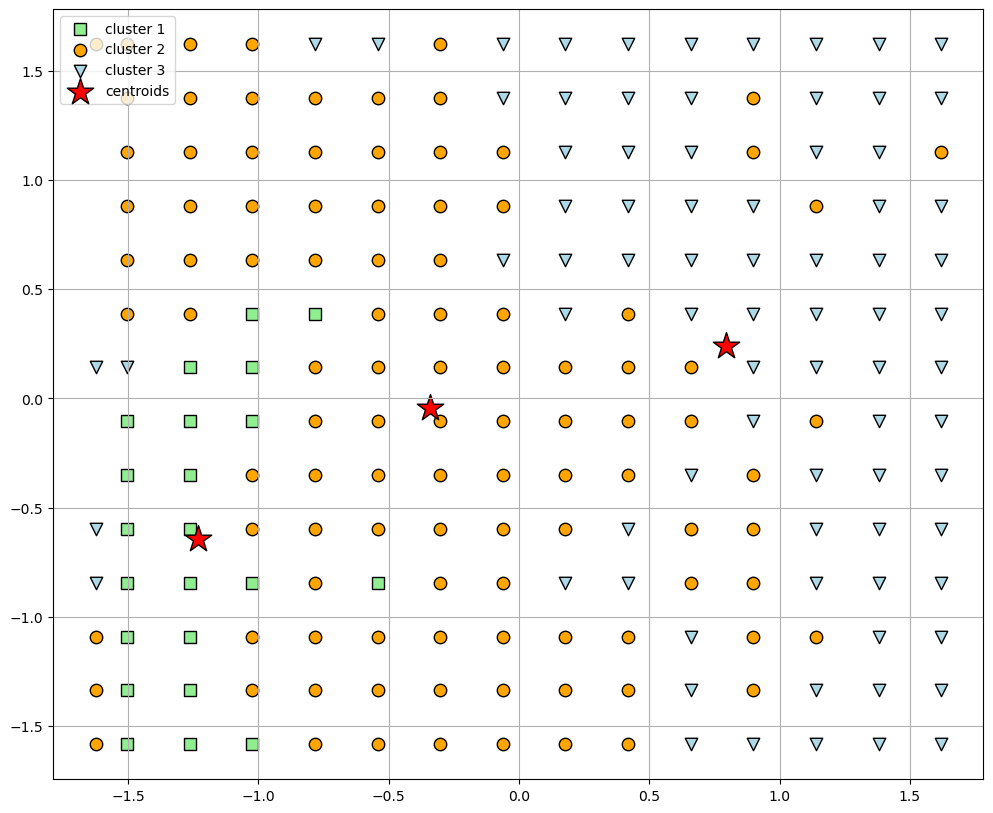

In [70]:
# plot the 4 clusters
plt.figure(figsize=(12,10))
plt.scatter(
    loc_df[y_km == 0, 0], loc_df[y_km == 0, 1],
    s=80, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    loc_df[y_km == 1, 0], loc_df[y_km == 1, 1],
    s=80, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    loc_df[y_km == 2, 0], loc_df[y_km == 2, 1],
    s=80, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plt.scatter(
#     loc_df[y_km == 3, 0], loc_df[y_km == 3, 1],
#     s=80, c='yellow',
#     marker='p', edgecolor='black',
#     label='cluster 4'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=400, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()